<a href="https://colab.research.google.com/github/Izemaj/lego-data-analysis/blob/main/Lego_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. 

<img src="https://i.imgur.com/49FNOHj.jpg">


# Import Statements

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

How many different colours does the LEGO company produce?  

In [9]:
colors = pd.read_csv("data/colors.csv")
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [10]:
colors["name"].nunique()

135

Number of transparent and opaque colours


In [11]:
colors.groupby('is_trans').count() 

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [12]:
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

##Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png"> 

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png"> 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.


In [13]:
sets = pd.read_csv("data/sets.csv")

In [14]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In which year were the first LEGO sets released and what were these sets called?

In [15]:
earliest_year = sets["year"].idxmin()
sets.loc[earliest_year]["name"]

'Extra-Large Gift Set (ABB)'

How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [16]:
sets[sets["year"] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


The top 5 LEGO sets with the most number of parts. 

In [17]:
sets.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


Show the number of LEGO sets released year-on-year.

In [18]:
sets_by_year = sets.groupby("year").count()
sets_by_year["set_num"].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

Text(0, 0.5, 'Number of Sets')

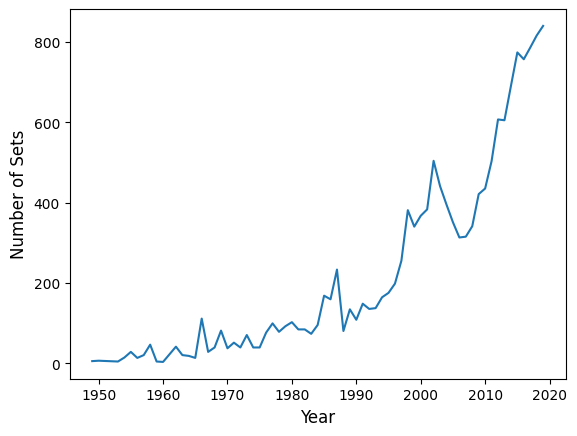

In [19]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Sets", fontsize=12)

**Based on the data presented, we can observe that during its initial years, LEGO released less than 10 sets per year. However, by 2019, the company experienced significant growth and published 840 sets in that year alone. Additionally, while LEGO had some steady growth in its product offerings during the first 45 years, the number of sets produced by the company increased dramatically in the mid-1990s. The chart also shows a brief decline in the early 2000s, followed by a strong recovery around 2005. Furthermore, we can also see that the increase in the number of releases was accompanied by an increase in the diversity of themes offered by LEGO. This suggests that the company was actively seeking to appeal to a wider range of customers and to expand its product offerings beyond its traditional themes.**


Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [20]:
themes_by_year = sets.groupby("year").agg({"theme_id": pd.Series.nunique})


In [21]:
themes_by_year.rename(columns={"theme_id" : "nr_themes"}, inplace = True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4



Let's plot the number of themes released by year on a line chart. Only including the full calendar years (i.e., exclude 2020 and 2021). 

Text(0, 0.5, 'Number of Themes')

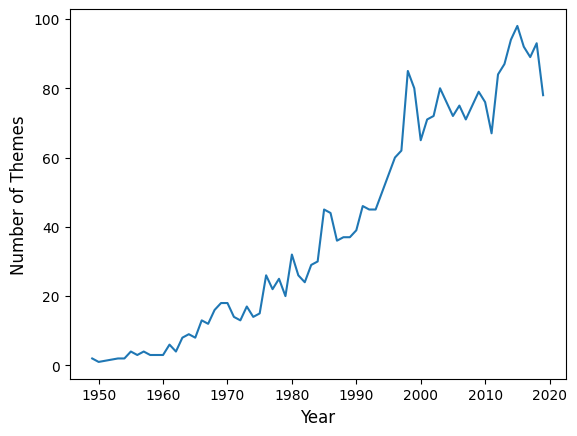

In [22]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Themes", fontsize=12)

Text(0, 0.5, 'Number of Themes')

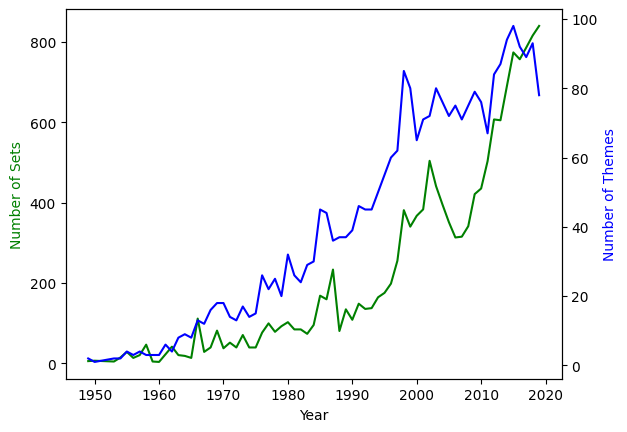

In [23]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color="g")
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], "b")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Sets", color="green")
ax2.set_ylabel("Number of Themes", color="blue")

**Looking at the charts above, it is evident that LEGO has steadily increased the number of themes and sets offered until the mid-1990s. However, from this point onward, the number of themes remained relatively constant for approximately a decade until the early 2010s. Overall, the data indicates that the LEGO company began to significantly expand its product offering in the mid-2000s, which may be indicative of a change in the company's overall strategy.**

How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [24]:
parts_per_set = sets.groupby("year").agg({"num_parts": pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [25]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


Has the size and complexity of LEGO sets increased over time based on the number of parts?

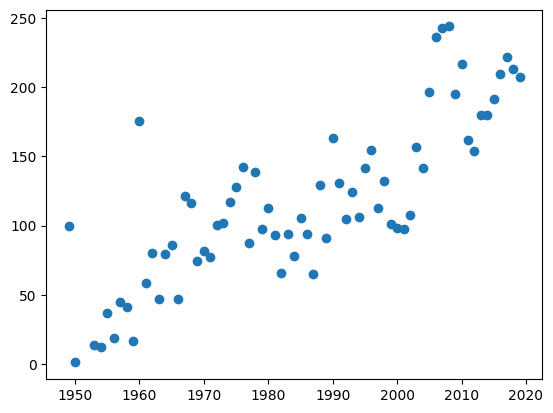

In [26]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

**Based on the chart, it is apparent that the size and complexity of LEGO sets have increased over time as the average number of parts has grown. Specifically, in the 2010s, the average set had approximately 200 pieces, which is approximately twice the number of parts that the average LEGO set had in the 1960s.**

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [27]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64


<img src="https://i.imgur.com/Sg4lcjx.png">


The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

In [28]:
themes = pd.read_csv("data/themes.csv")
themes[themes["name"] == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [29]:
sets[sets["theme_id"] == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


In [31]:
set_theme_count = pd.DataFrame({"id": set_theme_count.index, "set_count": set_theme_count.values.ravel()})

In [32]:
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [35]:
merged_df = pd.merge(set_theme_count, themes, on="id")
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


This result confirms that Star Wars is the LEGO theme with the most number of sets

##Bar Chart of Top 10 Themes

<BarContainer object of 10 artists>

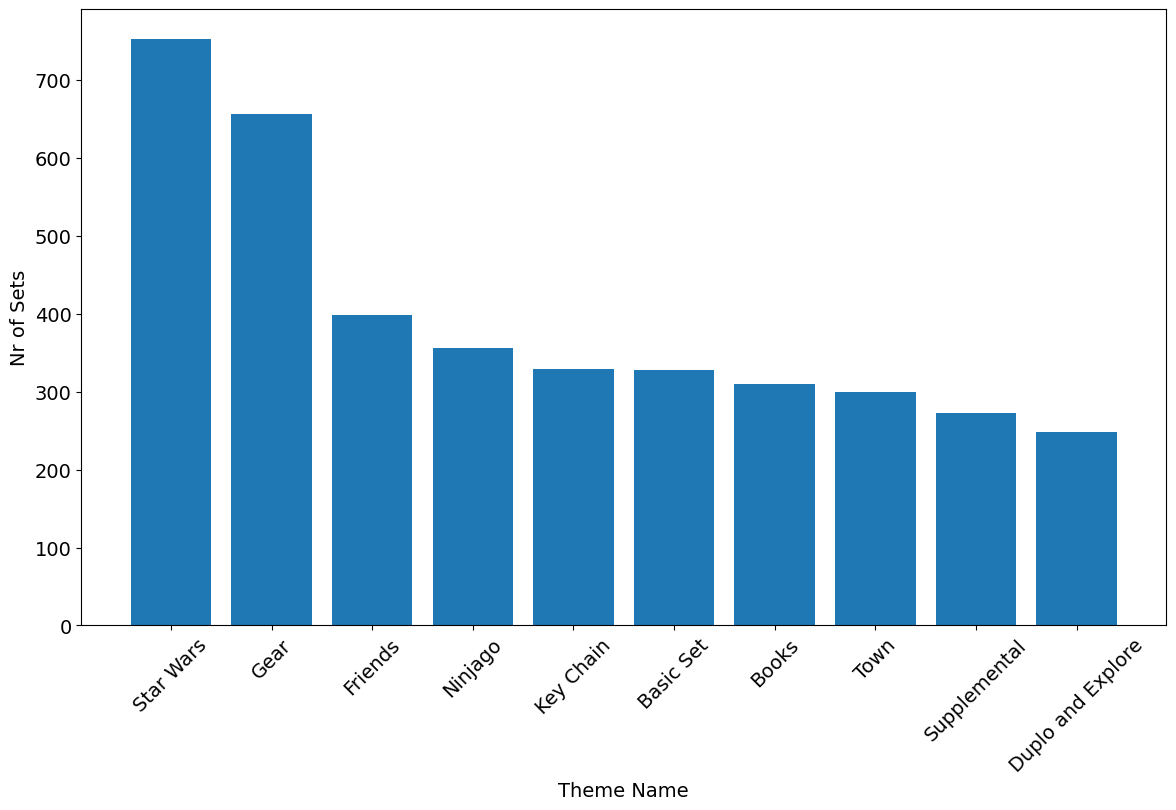

In [37]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])